<a href="https://colab.research.google.com/github/MALIPEDDIJAHNAVI/fml/blob/main/Univariate_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Regression on company dataset

importing required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import math
from plotly.offline import iplot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

loading dataset

In [2]:
company = pd.read_csv("/content/Company_data.csv")
     

In [3]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:

company.shape

(200, 4)

In [5]:
cp = company.corr()
cp

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


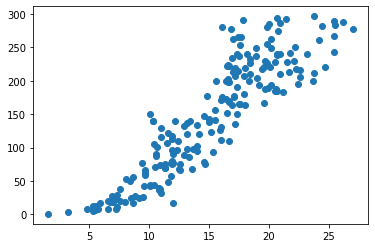

In [6]:
plt.scatter(company['Sales'],company['TV'])

Selecting input and output based on corr

In [9]:
x=company.drop('Sales',axis=1).values #dropping sales(o/p) from the table
y=company['Sales'].values
x1=x[:, 0] # tv is selected as input




In [10]:
x1=x1.reshape(-1,1)
y=y.reshape(-1,1) 

dividing the data as train data and test data

In [17]:

x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=35,train_size=0.70)

In [21]:
x_train.shape


(140, 1)

In [19]:
y_train.shape

(140, 1)

Training data model



In [23]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Calculating evaluation measures for regression for train data

In [26]:
y_train_pred=model.predict(x_train)

In [35]:
print("MAE for training data = ",mean_absolute_error(y_train,y_train_pred))
print("MSE for training data = ",mean_squared_error(y_train,y_train_pred))
print("R2score for training data = ",r2_score(y_train,y_train_pred))
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_train_pred))}')


MAE for training data =  1.8773843448532914
MSE for training data =  5.468522315169904
R2score for training data =  0.8123536934649148
RMSE = 2.3384871851626436


Calculating evalution measures for regression for test data

In [32]:
y_test_pred=model.predict(x_test)

In [36]:
print("MAE for training data = ",mean_absolute_error(y_test,y_test_pred))
print("MSE for training data = ",mean_squared_error(y_test,y_test_pred))
print("R2score for training data = ",r2_score(y_test,y_test_pred))
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

MAE for training data =  1.7186168406799462
MSE for training data =  4.708791927313346
R2score for training data =  0.8085245282359501
RMSE = 2.1699750983164177


Scatter plot for training data

In [38]:


prediction_space = np.linspace(min(x_train), max(x_train)).reshape(-1,1)

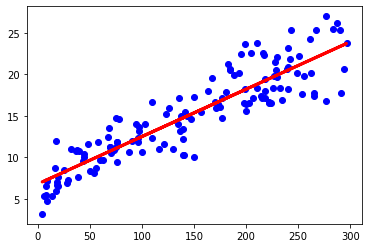

In [41]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red', linewidth=3)
plt.show()


Scatter plot for testing data 

In [42]:
prediction_space = np.linspace(min(x_test), max(x_test)).reshape(-1,1)

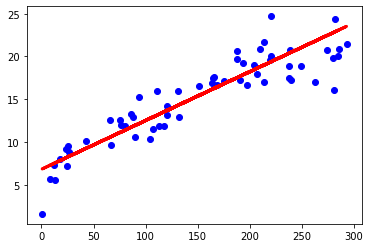

In [43]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, model.predict(x_test), color='red', linewidth=3)
plt.show()